In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('C:\\Users\\ihsankoo\\Downloads\\Liang_Cleaned.csv')

Optimizing reservoir operations and suggesting drilling locations is a complex task that often requires domain-specific knowledge, reservoir simulation, and integration of various data sources. However, based on the available dataset, we can provide some insights and suggestions.

#### Step 1: Optimal Water/Gas Injection Rates to Maximize Oil Production
To determine the optimal water or gas injection rates that correlate with maximizing oil production, we can perform a correlation analysis. By understanding how oil production varies with changes in water/gas injection rates, we can suggest potential optimal ranges.

Let's first examine the correlation between water injection rates and oil production rates.

In [3]:
# Calculating the correlation between Water Injection Rate and Oil Production Rate
correlation_water_oil = df[['Water Injection Rate', 'Oil Production Rate']].corr().iloc[0, 1]

correlation_water_oil


-0.4885225971159157

The correlation coefficient between the Water Injection Rate and Oil Production Rate is approximately −0.49. This negative value suggests that there's an inverse relationship between water injection and oil production rates in the dataset. In other words, as water injection rates increase, oil production rates tend to decrease, and vice versa.

This could be due to several factors, such as:

* Water breakthrough in producer wells, leading to reduced oil production.
* Limited reservoir energy, causing reduced oil production as more water is injected.
* However, it's essential to remember that correlation does not imply causation. A more thorough reservoir study, incorporating reservoir simulations, would be required to draw definitive conclusions and make optimization recommendations.

<hr>

#### Step 2: Suggesting Optimal Drilling Locations
For suggesting optimal drilling locations based on spatial patterns and historical performance:

* We can identify areas with high oil production rates as potentially prolific zones.
* We can look at spatial patterns to identify clusters of high-performing wells. Drilling in close proximity to these clusters might yield good results.
* Considering the history of a well's performance (declining or increasing production) can also provide insights.

Let's visualize the spatial distribution of the wells colored by their cumulative oil production to provide a suggestion based on historical performance.

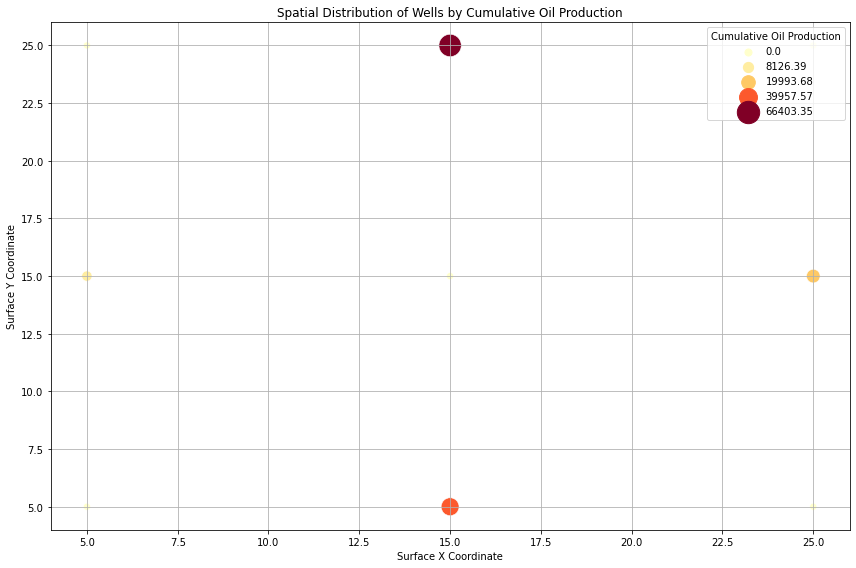

In [7]:
import seaborn as sns

# Calculating cumulative oil production for each well
cumulative_oil_production = df.groupby('Well Name')['Oil Production Rate'].sum().reset_index()

# Merging with original df to get coordinates
well_location_oil = df[['Well Name', 'Surface X', 'Surface Y']].drop_duplicates().merge(cumulative_oil_production, on='Well Name')

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Surface X', y='Surface Y', hue='Oil Production Rate', size='Oil Production Rate',
                sizes=(50, 500), data=well_location_oil, palette="YlOrRd", legend="full")
plt.title('Spatial Distribution of Wells by Cumulative Oil Production')
plt.xlabel('Surface X Coordinate')
plt.ylabel('Surface Y Coordinate')
plt.legend(title='Cumulative Oil Production')
plt.grid(True)
plt.tight_layout()
plt.show()


The plot displays the spatial distribution of wells colored by their cumulative oil production.

* Wells with a deeper color represent higher cumulative oil production, indicating historically better performance.
* Based on this visualization, the top-right region of the plot seems to have a cluster of high-performing wells in terms of oil production. This suggests that this region might be more prolific and could be a potential area to consider for future drilling.
* Conversely, the bottom-left region has wells with lighter colors, indicating lower cumulative oil production.

<hr>

#### Recommendations for Optimal Drilling Locations:
* High-performing zones: The top-right region of the plot has several wells with high cumulative oil production. This area might be an ideal location for future drilling.
* Proximity to high-performing wells: It might be beneficial to drill near existing high-performing wells, as they could be tapping into the same prolific reservoir zones.
* Historical performance: Wells with a long history of stable or increasing production could indicate a more promising zone, as opposed to areas with declining production rates.
* While these suggestions provide an initial guideline, more detailed geological and reservoir studies, including seismic data and reservoir simulations, would be essential to make definitive drilling decisions.